<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this step

1. Added Dropout to the Model architecture from Step-2 
2. Used GAP in the the last layer. 
3. Target is to achieve over 99% validation accuracy with the same number of parameters which is 8582 in step-2
4. If I am able to achieve over 99% accuracy then I would consider the change to be positive and try to enhance further to improve the accuracy 
5. Run it for 15 epochs to study how the change affects the accuracy improvement and also if it's a stable increase 

Result: 
======
1. Observed Train accuracy: 98.69%
2. Validation accuracy:99.35%
3. Number of parameters: 8,582


Analysis: 
========

1. As expected validation accuracy has  improved over 99% and touched 99.35% in this step.It's also important to see that many epochs achieved over 99% accuracy which is a positive sign
2. I also observe that validation accuracy 99.35 is much higher than training accuracy 98.69. These could be because of regularization effect of batch normalization and droupout introudced in this step
3. Also, number of parameters is 8582 is well within my target of 10K parameters

In [2]:
from model import model3 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
       BatchNorm2d-3           [-1, 14, 28, 28]              28
         Dropout2d-4           [-1, 14, 28, 28]               0
            Conv2d-5           [-1, 14, 28, 28]           1,764
              ReLU-6           [-1, 14, 28, 28]               0
       BatchNorm2d-7           [-1, 14, 28, 28]              28
         Dropout2d-8           [-1, 14, 28, 28]               0
         MaxPool2d-9           [-1, 14, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,764
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:172: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=0.08648717403411865 Batch_id=468 Accuracy=87.94: 100%|██████████████████████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0643, Accuracy: 9821/10000 (98.21%)

Currently Executing Epoch: 2


Loss=0.0496918261051178 Batch_id=468 Accuracy=96.76: 100%|███████████████████████████| 469/469 [01:19<00:00,  5.87it/s]



Test set: Average loss: 0.0495, Accuracy: 9841/10000 (98.41%)

Currently Executing Epoch: 3


Loss=0.032786864787340164 Batch_id=468 Accuracy=97.44: 100%|█████████████████████████| 469/469 [01:14<00:00,  6.29it/s]



Test set: Average loss: 0.0365, Accuracy: 9886/10000 (98.86%)

Currently Executing Epoch: 4


Loss=0.03335394337773323 Batch_id=468 Accuracy=97.87: 100%|██████████████████████████| 469/469 [01:22<00:00,  5.67it/s]



Test set: Average loss: 0.0287, Accuracy: 9912/10000 (99.12%)

Currently Executing Epoch: 5


Loss=0.04337694123387337 Batch_id=468 Accuracy=98.01: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.35it/s]



Test set: Average loss: 0.0273, Accuracy: 9918/10000 (99.18%)

Currently Executing Epoch: 6


Loss=0.08055901527404785 Batch_id=468 Accuracy=98.15: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.35it/s]



Test set: Average loss: 0.0263, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 7


Loss=0.07379027456045151 Batch_id=468 Accuracy=98.39: 100%|██████████████████████████| 469/469 [01:14<00:00,  6.32it/s]



Test set: Average loss: 0.0245, Accuracy: 9924/10000 (99.24%)

Currently Executing Epoch: 8


Loss=0.08130168169736862 Batch_id=468 Accuracy=98.31: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.36it/s]



Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 9


Loss=0.008385512046515942 Batch_id=468 Accuracy=98.48: 100%|█████████████████████████| 469/469 [01:13<00:00,  6.36it/s]



Test set: Average loss: 0.0232, Accuracy: 9921/10000 (99.21%)

Currently Executing Epoch: 10


Loss=0.020944111049175262 Batch_id=468 Accuracy=98.52: 100%|█████████████████████████| 469/469 [01:15<00:00,  6.22it/s]



Test set: Average loss: 0.0239, Accuracy: 9917/10000 (99.17%)

Currently Executing Epoch: 11


Loss=0.009749235585331917 Batch_id=468 Accuracy=98.63: 100%|█████████████████████████| 469/469 [01:13<00:00,  6.38it/s]



Test set: Average loss: 0.0214, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 12


Loss=0.035759832710027695 Batch_id=468 Accuracy=98.64: 100%|█████████████████████████| 469/469 [01:13<00:00,  6.37it/s]



Test set: Average loss: 0.0212, Accuracy: 9935/10000 (99.35%)

Currently Executing Epoch: 13


Loss=0.01223295833915472 Batch_id=468 Accuracy=98.65: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.36it/s]



Test set: Average loss: 0.0253, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 14


Loss=0.017847705632448196 Batch_id=468 Accuracy=98.69: 100%|█████████████████████████| 469/469 [01:12<00:00,  6.46it/s]



Test set: Average loss: 0.0247, Accuracy: 9913/10000 (99.13%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

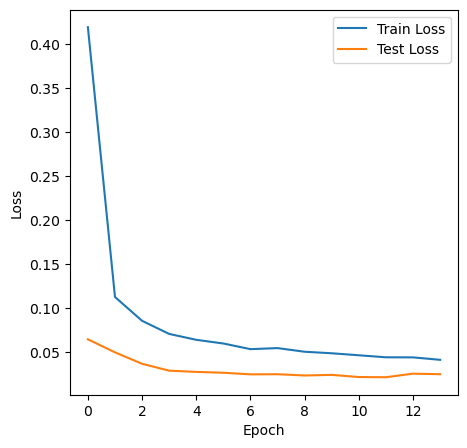

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

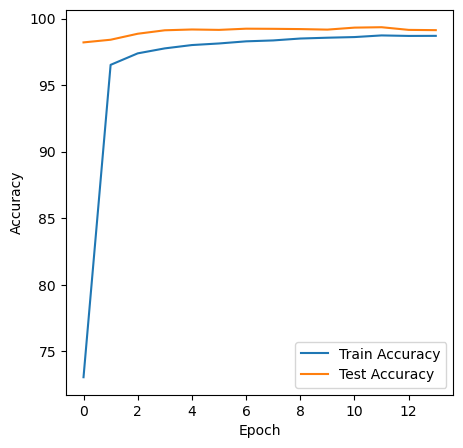

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
